Here we can find some spotify musics data. We are trying to find the best correlation beetween variables such as danceability, valence, energy, tempo and more.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url= 'https://raw.githubusercontent.com/KadeF10/Spotify/main/data.csv'
df= pd.read_csv(url)
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
df.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [4]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X= df[["danceability"]]
Y= df["energy"]
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5] 

array([0.69238065, 0.68784936, 0.69263239, 0.67531279, 0.68457676])

In [5]:
Z= df[["loudness", "tempo", "energy", "instrumentalness"]]
lm.fit(Z, df['danceability'])


LinearRegression()

In [6]:
lm.intercept_

0.8068071128741681

In [7]:
lm.coef_

array([ 0.00577454, -0.00094406, -0.03770312, -0.05230038])

In [8]:
import seaborn as sns
%matplotlib inline 

(0.0, 1.04716)

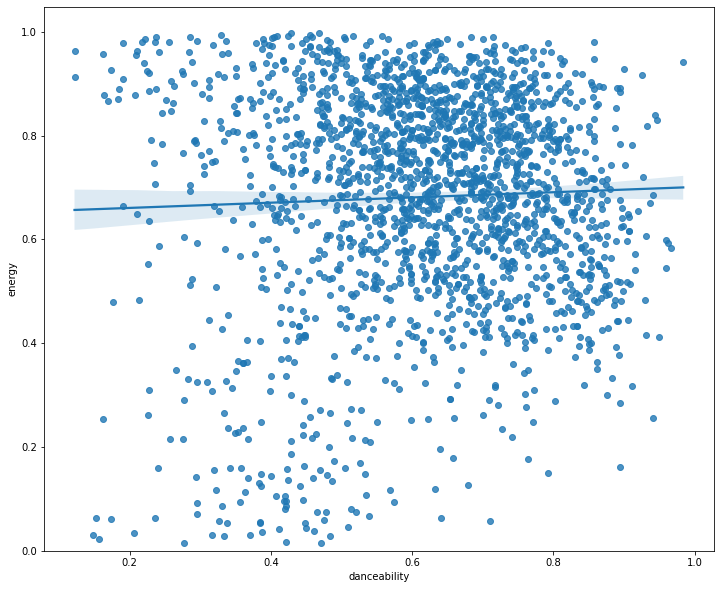

In [9]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="danceability", y="energy", data=df)
plt.ylim(0,)

(0.0, 1.0271)

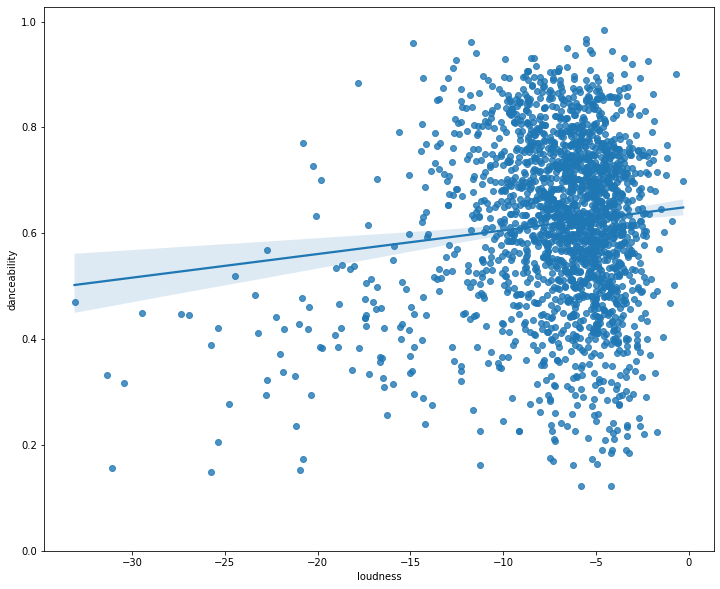

In [10]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="loudness", y="danceability", data=df)
plt.ylim(0,)

(0.0, 1.0271)

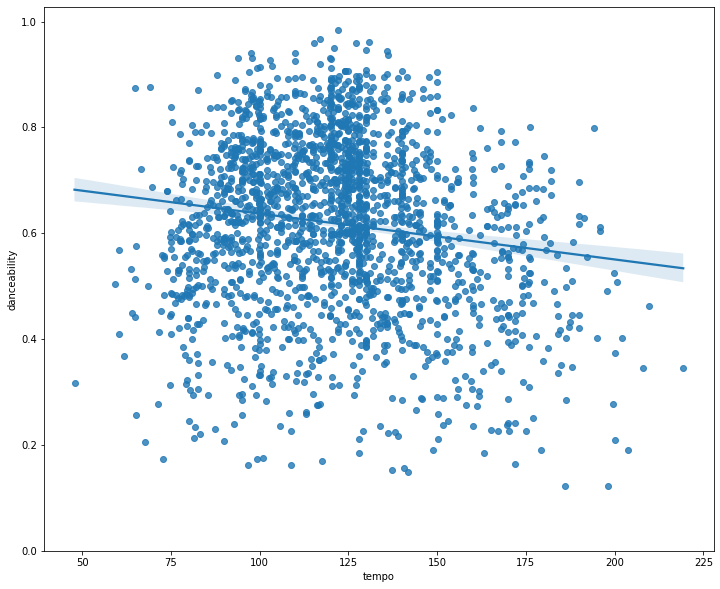

In [11]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="tempo", y="danceability", data=df)
plt.ylim(0,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


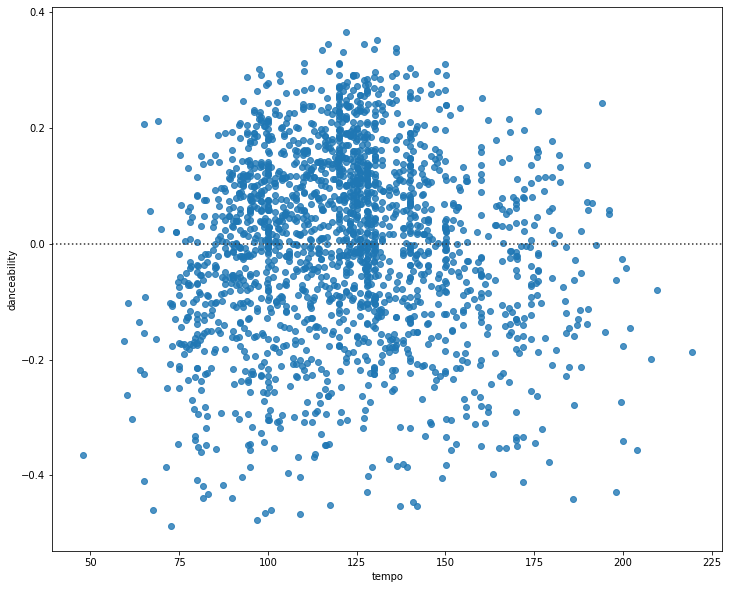

In [12]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['tempo'], df['danceability'])
#sns.regplot(df["tempo"],df["danceability"])
#plt.ylim(-10000,)
plt.show()

In [13]:
Y_hat= lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


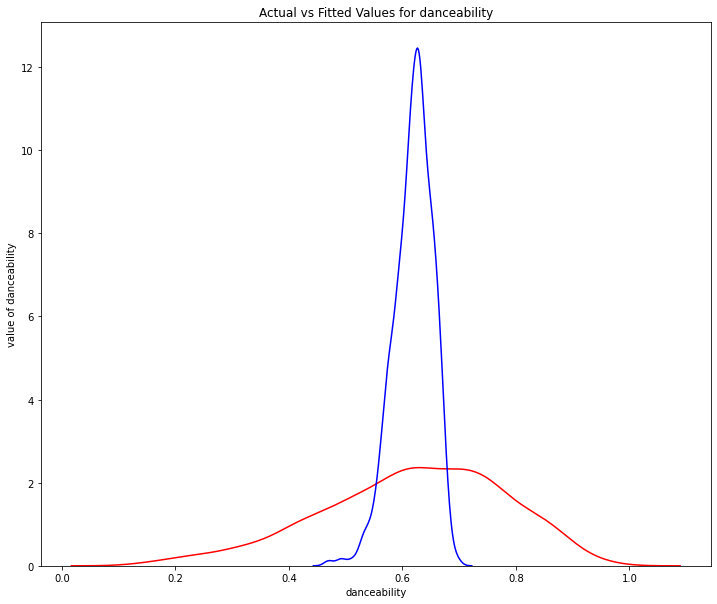

In [14]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['danceability'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for danceability')
plt.xlabel('danceability')
plt.ylabel('value of danceability')

plt.show()
plt.close()

In [15]:
lm.fit(Z, df['danceability'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['danceability']))

The R-square is:  0.04621933049595006


In [16]:
X= df[["loudness", "tempo", "energy", "instrumentalness"]]

In [17]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [0.59684431 0.58176355 0.67913891 0.5977786 ]


In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
mse = mean_squared_error(df['danceability'], Yhat)
print('The mean square error of danceability and predicted value is: ', mse)

The mean square error of danceability and predicted value is:  0.02471958423455911


In [20]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for danceability ~ spotify')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('danceability')

    plt.show()
    plt.close()

In [21]:
x = df['tempo']
y = df['danceability']

In [22]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3            2
4.692e-07 x - 0.000229 x + 0.03367 x - 0.8962


In [23]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [24]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('danceability')
    plt.ylabel('instrumentalness')

    plt.show()
    plt.close()

In [25]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('danceability')
    plt.legend()

In [26]:

y_data = df['energy']
x_data=df.drop('energy',axis=1)

In [27]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 404
number of training samples: 1613


In [28]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['valence']], y_train)
lre.score(x_test[['valence']], y_test)
lre.score(x_train[['valence']], y_train)

0.08325970965730078

In [29]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.2, random_state=0)
lre.fit(x_train1[['valence']],y_train1)
lre.score(x_test1[['valence']],y_test1)

0.07112782219590175

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
Rcross = cross_val_score(lre, x_data[['valence']], y_data, cv=4)
Rcross

array([ 0.07452079,  0.02893934, -0.21524701,  0.02797311])

In [32]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -0.020953441142412543 and the standard deviation is 0.11374139055950014


In [33]:
-1 * cross_val_score(lre,x_data[['valence']], y_data,cv=4,scoring='neg_mean_squared_error')

array([0.02719023, 0.03116622, 0.04266545, 0.07278136])

In [34]:
Rc=cross_val_score(lre,x_data[['valence']], y_data,cv=2)
Rc.mean()

0.0561066862946647

In [35]:
from sklearn.model_selection import cross_val_predict

In [36]:
yhat = cross_val_predict(lre,x_data[['valence']], y_data,cv=4)
yhat[0:5]

array([0.62924493, 0.70575973, 0.60061522, 0.61505675, 0.78582158])

In [ ]:
lr = LinearRegression()
lr.fit(x_train[['liveness', 'danceability', 'loudness', 'tempo']], y_train)

LinearRegression()

In [ ]:
yhat_train = lr.predict(x_train[['liveness', 'danceability', 'loudness', 'tempo']])
yhat_train[0:5]

array([0.65170246, 0.81838584, 0.75552374, 0.11611542, 0.65465369])

In [ ]:
yhat_test = lr.predict(x_test[['instrumentalness', 'danceability', 'loudness', 'tempo']])
yhat_test[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- instrumentalness
Feature names seen at fit time, yet now missing:
- liveness

  warnings.warn(message, FutureWarning)


array([0.73164041, 0.7828119 , 0.72336763, 0.75054247, 0.79209692])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


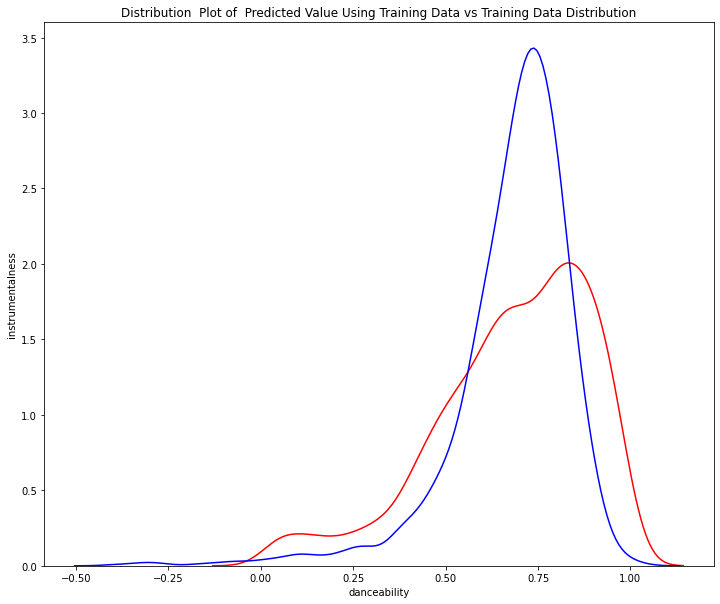

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


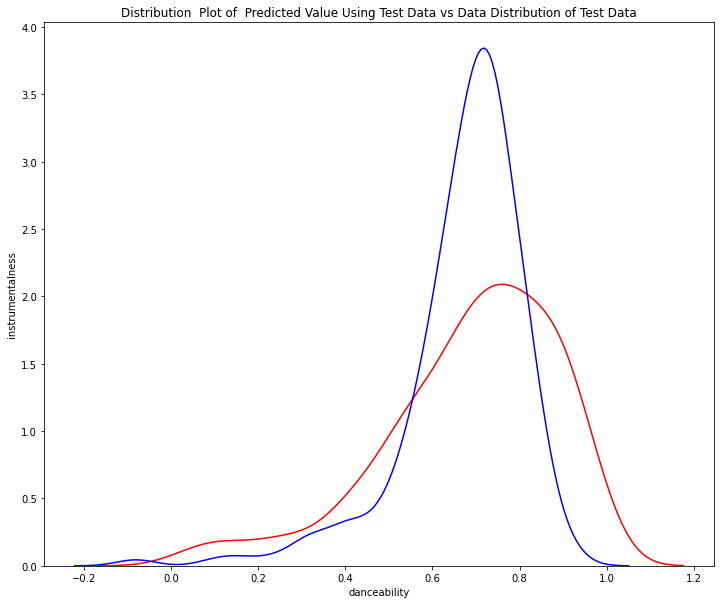

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [ ]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['danceability']])
x_test_pr = pr.fit_transform(x_test[['danceability']])
pr

PolynomialFeatures(degree=5)

In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [ ]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([0.66958129, 0.71903044, 0.68630302, 0.60918713, 0.65769627])

In [ ]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [0.66958129 0.71903044 0.68630302 0.60918713]
True values: [0.635 0.841 0.945 0.648]


In [ ]:
poly.score(x_train_pr, y_train)
poly.score(x_test_pr, y_test)

0.017684136435680897

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
pr = PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train[['danceability']])

x_test_pr = pr.fit_transform(x_test[['danceability']])    

lr.fit(x_train_pr, y_train)
yhat_test=lr.predict(x_test_pr)
yhat_train=lr.predict(x_train_pr)
mse_test= [mean_squared_error(y_test, yhat_test)]
mse_train = mean_squared_error(y_train, yhat_train)
mse_test.append(mse_test)
mse_test

[0.04464438008939587, [...]]

0.04541550130182779 order = 1
0.04464438008939587 order = 2
0.04424311653861893 order = 3
0.04465370119722988 order = 4
0.04461895754021975 order = 5
0.04456428549460391 order = 6
0.04445118680662558 order = 7
0.044365488753436676 order = 8
0.04426636593079232 order = 9
0.044145260993287146 order = 10


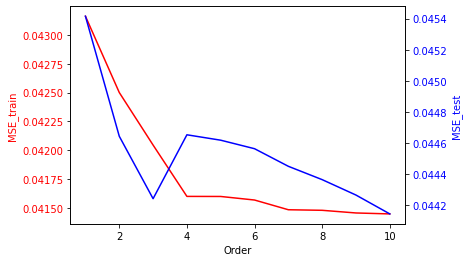

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
mse_test_list = []
mse_train_list = []
order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in order:
    #polynomial transformation
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['danceability']])
    x_test_pr = pr.fit_transform(x_test[['danceability']])    
    
    lr.fit(x_train_pr, y_train) #estimate optimal model parameters
    yhat_test=lr.predict(x_test_pr) #make predictions using model params for test y
    yhat_train=lr.predict(x_train_pr) #make predictions using model params for training y
    mse_test= mean_squared_error(y_test, yhat_test) #calculate MSE for test set
    mse_train = mean_squared_error(y_train, yhat_train) #calculate MSE for training set
    mse_test_list.append(mse_test) #append to list
    mse_train_list.append(mse_train) #append to list
    print(str(mse_test)+' '+'order = '+str(n))

# plot using two axis - this eliminates visual problems of different scales, should it exist
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('Order') 
ax1.set_ylabel('MSE_train', color = 'red') 
ax1.plot(order, mse_train_list, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
  
# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('MSE_test', color = 'blue') 
ax2.plot(order, mse_test_list, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
 
# Show plot

plt.show()

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:07<00:00, 128.85it/s, Test Score=-.00104, Train Score=0.000136]


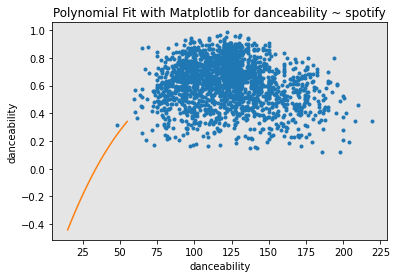

In [ ]:
PlotPolly(p, x, y, 'danceability')